In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\mainCode\data.csv")


# song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False, n_jobs=4))], verbose=False)
song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False))], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data["cluster_label"] = song_cluster_labels


from sklearn.decomposition import PCA

pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=["x", "y"], data=song_embedding)
projection["title"] = data["name"]
projection["cluster"] = data["cluster_label"]

# fig = px.scatter(projection, x="x", y="y", color="cluster", hover_data=["x", "y", "title"])
# fig.show()

c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\musicRecommenderVenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


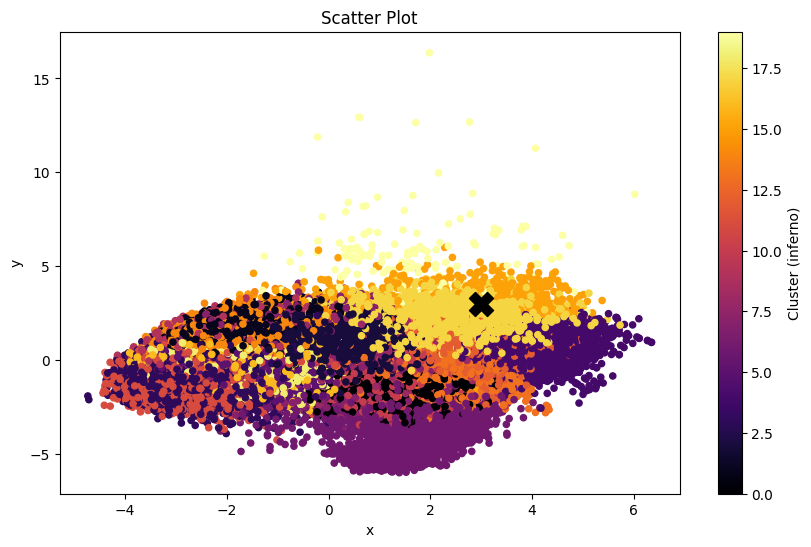

In [16]:
import matplotlib.pyplot as plt


cmaps = [
    ("Perceptually Uniform Sequential", ["viridis", "plasma", "inferno", "magma", "cividis"]),
    ("Sequential", ["Greys", "Purples", "Blues", "Greens", "Oranges", "Reds", "YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", "GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"]),
    ("Sequential (2)", ["binary", "gist_yarg", "gist_gray", "gray", "bone", "pink", "spring", "summer", "autumn", "winter", "cool", "Wistia", "hot", "afmhot", "gist_heat", "copper"]),
    ("Diverging", ["PiYG", "PRGn", "BrBG", "PuOr", "RdGy", "RdBu", "RdYlBu", "RdYlGn", "Spectral", "coolwarm", "bwr", "seismic"]),
    ("Cyclic", ["twilight", "twilight_shifted", "hsv"]),
    ("Qualitative", ["Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"]),
    (
        "Miscellaneous",
        ["flag", "prism", "ocean", "gist_earth", "terrain", "gist_stern", "gnuplot", "gnuplot2", "CMRmap", "cubehelix", "brg", "gist_rainbow", "rainbow", "jet", "turbo", "nipy_spectral", "gist_ncar"],
    ),
]


plt.figure(figsize=(10, 6))
# cmap = plt.cm.gray
# cmap = "turbo"
cmap = cmaps[0][1][2] # inferno
dot_size = 20
scatter = plt.scatter(projection["x"], projection["y"], c=projection["cluster"], cmap=cmap, s=dot_size)
specific_point = {"x": 3.0, "y": 3.0, "cluster": 1}  # Replace with your specific data
plt.scatter(specific_point["x"], specific_point["y"], c="black", s=300, marker="X")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot")
cbar = plt.colorbar(scatter, label=f"Cluster ({cmap})")
# plt.show()
plt.savefig(f"kNearestSkLearn{cmap}.png")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

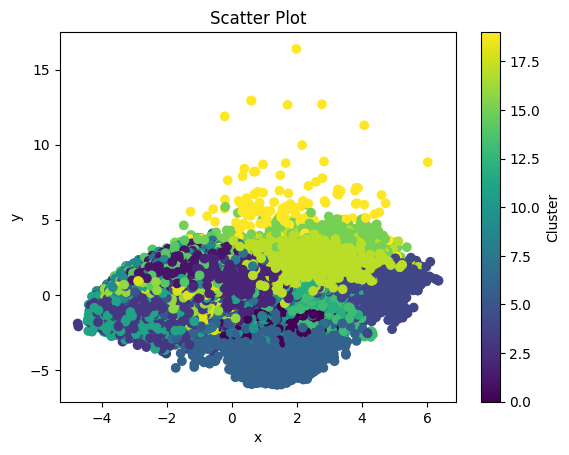

In [2]:
scatter = plt.scatter(projection["x"], projection["y"], c=projection["cluster"], cmap="viridis")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot")
cbar = plt.colorbar(scatter, label="Cluster")
plt.show()
# plt.savefig("kNearestSkLearn.png")